In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from competency_mapping import standardize_competency
df = pd.read_csv("cleaned_merged_jobs.csv")
df.head()

,title,description,sector_extracted,job_category,competence_cleaned,company_name,Region,contract_type,niveau d'études requis,niveau d'expérience,posted_date,remote_work
0,Ingénieur Full-Stack | Casablanca (Maroc),NaN,['Informatique'],Autre,NaN,Deloitte Extended Services,NaN,CDI,NaN,NaN,10/06/2025,Hybride
1,Test Manager Anglophone (H/F) | Rabat (Maroc),NaN,['Informatique'],Management,NaN,AXA Services Maroc,NaN,CDI,NaN,NaN,10/06/2025,Hybride
2,Digital Campaign Production Manager | Casablan...,NaN,"['Informatique', 'Telecom']",Science & IA,NaN,Orange Business,NaN,CDI,NaN,NaN,10/06/2025,Hybride
3,Click & Webmaster | Casablanca (Maroc),NaN,"['Informatique', 'Telecom']",Autre,NaN,Orange Business,NaN,CDI,NaN,NaN,10/06/2025,Hybride
4,Click User Support Manager | Casablanca (Maroc),NaN,"['Informatique', 'Telecom']",Support,NaN,Orange Business,NaN,CDI,NaN,NaN,10/06/2025,Hybride


In [4]:
# Drop rows where 'Region' is NaN and create a copy
df_region_cleaning = df.dropna(subset=['Region']).copy()

# Print value counts of the 'Region' column before cleaning
print("Original Region value counts:")
print(df_region_cleaning['Region'].value_counts().to_markdown(numalign="left", stralign="left"))

Original Region value counts:
| Region                                                                | count   |
|:----------------------------------------------------------------------|:--------|
| Casablanca-Mohammedia                                                 | 188     |
| Casablanca                                                            | 160     |
| Agadir - Béni Mellal-Khénifra - Casablanca-Mohammedia - Dakhla -...   | 116     |
| Casablanca-Mohammedia                                                 | 86      |
| Rabat-Salé-Kénitra                                                    | 52      |
| Rabat                                                                 | 47      |
| Marrakech                                                             | 44      |
| Agadir - Béni Mellal-Khénifra - Casablanca-Mohammedia - Dakhla -...   | 41      |
| Rabat-Salé-Kénitra                                                    | 26      |
| Tanger-Tétouan-Al Hoceïma                   

In [5]:
# Drop rows where 'Region' is NaN and create a copy
df_cleaned_region = df.dropna(subset=['Region']).copy()

# Strip whitespace from the 'Region' column
df_cleaned_region['Region'] = df_cleaned_region['Region'].astype(str).str.strip()

# Standardize common variations
df_cleaned_region['Region'] = df_cleaned_region['Region'].replace({
    r'Casablanca-Mohammedia': 'Casablanca',
    r'Rabat-Salé-Kénitra': 'Rabat',
    r'Marrakech-Safi': 'Marrakech',
    r'Tanger-Tétouan-Al Hoceïma': 'Tanger',
    r'Agadir': 'Agadir',
    r'Fès': 'Fès',
    r'Meknès': 'Meknès',
    r'Oujda': 'Oujda',
    r'Settat': 'Settat',
    r'Errachidia': 'Errachidia',
    r'Laâyoune': 'Laâyoune',
    r'Béni Mellal-Khénifra': 'Béni Mellal-Khénifra',
    r'Dakhla': 'Dakhla',
    r'Kénitra': 'Kénitra',
    r'Salé': 'Salé',
    r'Tétouan': 'Tétouan',
    r'Al Hoceïma': 'Al Hoceïma'
}, regex=True)

In [6]:
# Handle multiple regions
# Function to classify regions
def classify_region(region):
    if 'International' in region:
        return 'International'
    elif ' - ' in region or ' & ' in region:
        return 'Multiple Regions'
    return region

In [7]:
df_cleaned_region['Region'] = df_cleaned_region['Region'].apply(classify_region)

# Print value counts of the 'Region' column after cleaning
print("\nCleaned Region value counts:")
print(df_cleaned_region['Region'].value_counts().to_markdown(numalign="left", stralign="left"))



Cleaned Region value counts:
| Region               | count   |
|:---------------------|:--------|
| Casablanca           | 434     |
| Multiple Regions     | 212     |
| Rabat                | 125     |
| Marrakech            | 65      |
| Tanger               | 43      |
| International        | 33      |
| Agadir               | 9       |
| Fès                  | 4       |
| Oujda                | 2       |
| Béni Mellal-Khénifra | 1       |
| Meknès               | 1       |


In [8]:
# Get the top 10 regions after cleaning
cleaned_region_counts = df_cleaned_region['Region'].value_counts()
top_10_cleaned_regions = cleaned_region_counts.head(10)

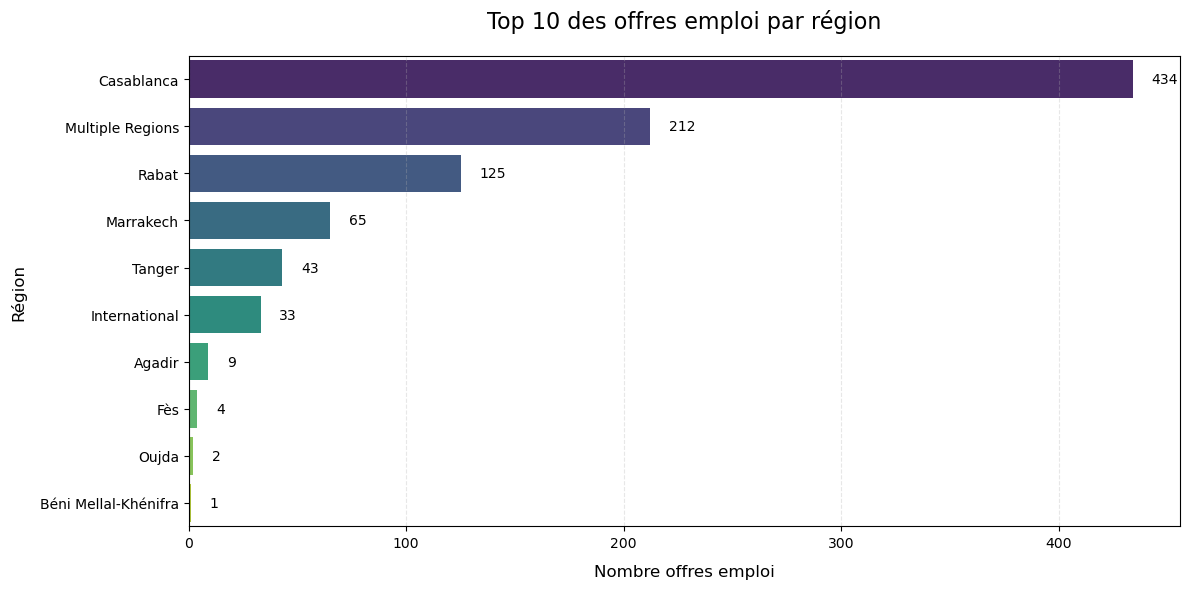

In [17]:
# Create bar chart for top 10 regions
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    y=top_10_cleaned_regions.index,
    x=top_10_cleaned_regions.values,
    hue=top_10_cleaned_regions.index,
    palette='viridis',
    legend=False,
    dodge=False
)

# Customize the chart
plt.title('Top 10 des offres emploi par région', fontsize=16, pad=20)
plt.xlabel('Nombre offres emploi', fontsize=12, labelpad=10)
plt.ylabel('Région', fontsize=12, labelpad=10)

# Add value labels to each bar
for i, value in enumerate(top_10_cleaned_regions.values):
    ax.text(
        value + max(top_10_cleaned_regions.values)*0.02,  
        i,  
        f'{value:,}',  
        va='center',
        fontsize=10
    )

# Improve grid and layout
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('offres_emploi_par_region.png')
# Show the plot
plt.show()

In [23]:
# Drop rows with missing competency data
df_competence = df.dropna(subset=['competence_cleaned']).copy()

# Define processing function
def process_competencies(competence_str):
    """Split and standardize competencies string"""
    if pd.isna(competence_str):
        return []
    competencies = [comp.strip() for comp in str(competence_str).split(',')]
    return [standardize_competency(comp) for comp in competencies]

# Apply processing
df_competence['competence_processed'] = df_competence['competence_cleaned'].apply(process_competencies)

# Explode the list into separate rows
df_exploded = df_competence.explode('competence_processed')

# Display processed data
df_exploded.head()

,title,description,sector_extracted,job_category,competence_cleaned,company_name,Region,contract_type,niveau d'études requis,niveau d'expérience,posted_date,remote_work,competence_processed
406,Expert Intégration et Homologation SAB AT - Ca...,"Pour notre client en secteur bancaire, dans le...",Informatique,Science & IA,ALM,VISION BUSINESS CONSULTING,Casablanca-Mohammedia,Freelance,Bac+5 et plus,Expérience entre 5 ans et 10 ans & Expérience ...,05.06.2025,NaN,Alm
407,ANGULAR Developer (M/F),We are looking for ANGULAR Developer profile...,Informatique,Science & IA,"BOOTSTRAP, CSS3, CVS, GIT, JAVASCRIPT, JQUERY,...",AFRICASHORE,Agadir - Béni Mellal-Khénifra - Casablanca-Moh...,"CDI, CDD - Freelance",Bac+3,Expérience entre 5 ans et 10 ans,04.06.2025,NaN,Bootstrap
407,ANGULAR Developer (M/F),We are looking for ANGULAR Developer profile...,Informatique,Science & IA,"BOOTSTRAP, CSS3, CVS, GIT, JAVASCRIPT, JQUERY,...",AFRICASHORE,Agadir - Béni Mellal-Khénifra - Casablanca-Moh...,"CDI, CDD - Freelance",Bac+3,Expérience entre 5 ans et 10 ans,04.06.2025,NaN,Css3
407,ANGULAR Developer (M/F),We are looking for ANGULAR Developer profile...,Informatique,Science & IA,"BOOTSTRAP, CSS3, CVS, GIT, JAVASCRIPT, JQUERY,...",AFRICASHORE,Agadir - Béni Mellal-Khénifra - Casablanca-Moh...,"CDI, CDD - Freelance",Bac+3,Expérience entre 5 ans et 10 ans,04.06.2025,NaN,Cvs
407,ANGULAR Developer (M/F),We are looking for ANGULAR Developer profile...,Informatique,Science & IA,"BOOTSTRAP, CSS3, CVS, GIT, JAVASCRIPT, JQUERY,...",AFRICASHORE,Agadir - Béni Mellal-Khénifra - Casablanca-Moh...,"CDI, CDD - Freelance",Bac+3,Expérience entre 5 ans et 10 ans,04.06.2025,NaN,Git


In [25]:
# Count competency frequencies
competency_counts = df_exploded['competence_processed'].value_counts()

# Display top 20 competencies
top_competencies = competency_counts.head(20)
top_competencies

competence_processed
SQL           113
JavaScript     93
Agile          90
Cvs            82
Java           76
Git            72
Gestion        70
Linux          63
Python         58
HTML           56
CSS            55
MySQL          54
Oracle DB      53
Docker         52
Api            49
Azure          49
Jenkins        42
Microsoft      40
Sap            38
Scrum          37
Name: count, dtype: int64

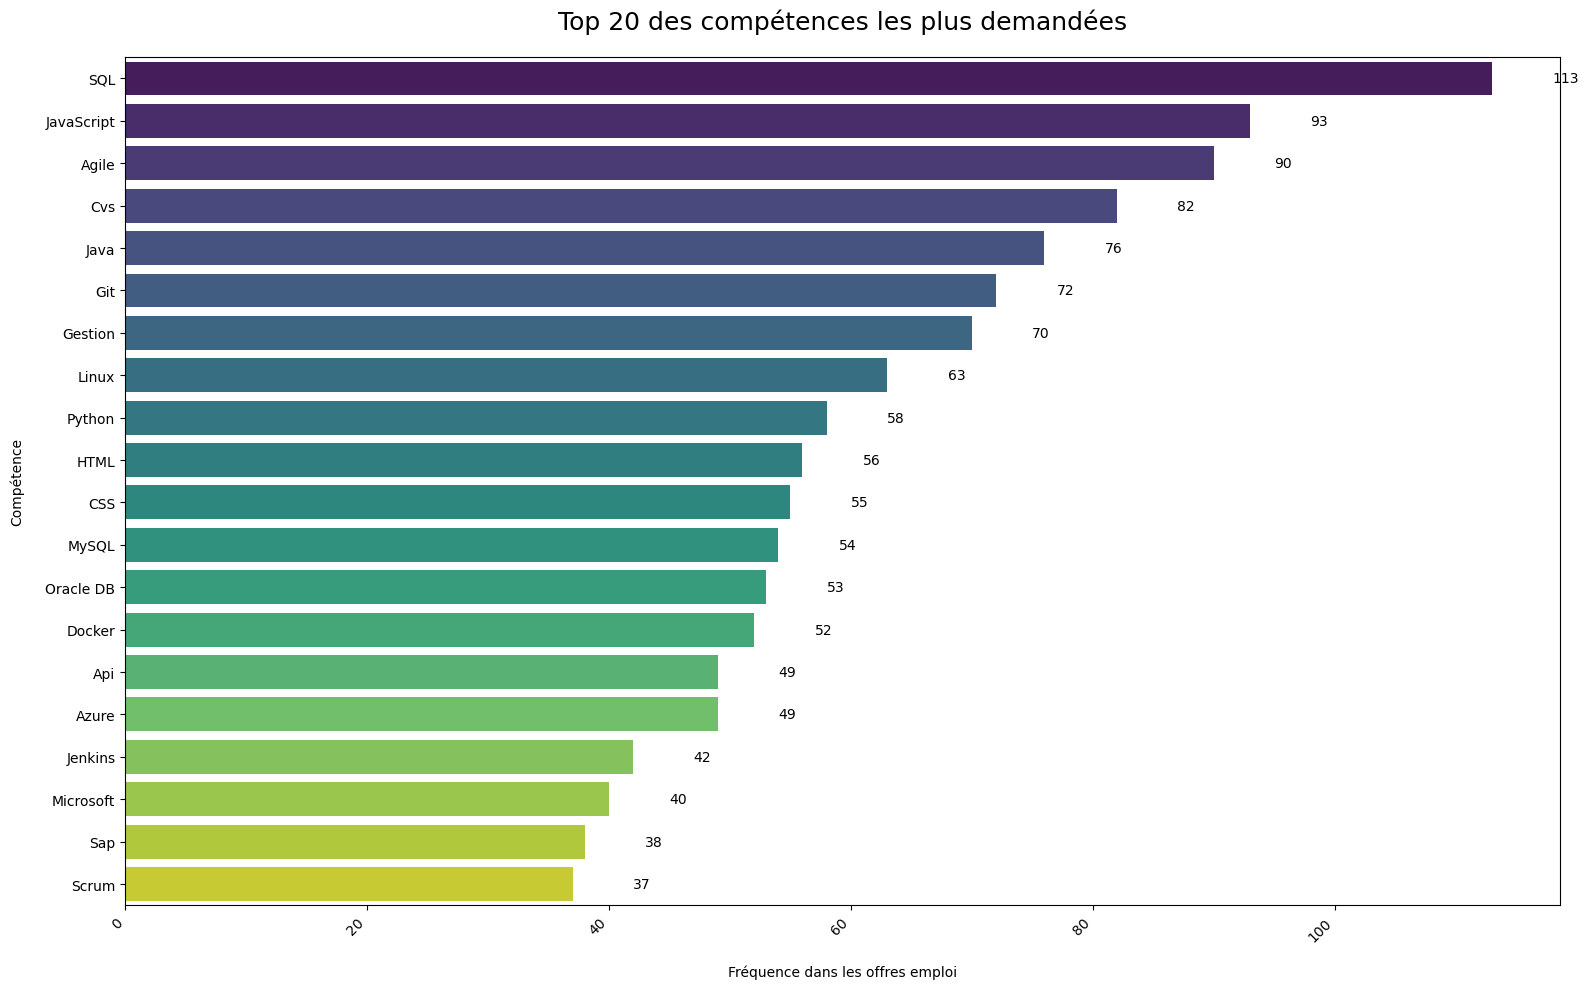

In [27]:
# Create horizontal bar plot
plt.figure(figsize=(16, 10))
ax = sns.barplot(
    y=top_competencies.index,
    x=top_competencies.values,
    hue=top_competencies.index,
    palette='viridis',
    legend=False,  
    dodge=False  
)

# Customize the plot
plt.title('Top 20 des compétences les plus demandées', pad=20, fontsize=18)
plt.xlabel('Fréquence dans les offres emploi', labelpad=15)
plt.ylabel('Compétence', labelpad=15)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, v in enumerate(top_competencies.values):
    ax.text(v + 5, i, str(v), color='black', ha='left', va='center')

plt.tight_layout()
plt.savefig('competences_les_plus_demandees.png')
plt.show()